***Dataset***

This notebook is designed to guide you through the process of exploring a dataset in preparation for machine learning tasks.    

- $\textcolor{#FF4500}{\text{You can easily adapt the repository to work with any dataset of your choice.}}$    
- The structure is flexible and can be applied to various machine learning models, including $\textcolor{#1E90FF}{\text{regression, classification, and clustering}}$.


<h1 align="center">Data Exploration for California Housing Price Prediction</h1>

# 1. Introduction

# 2. Setup

First, let's import the necessary libraries for data exploration and visualization.

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set up visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2.1. Loading the Dataset

We'll use Scikit-learn's built-in California Housing dataset. This dataset contains information collected from the 1990 California census.

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()

# Create a pandas DataFrame for easier manipulation
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='median_house_value')

# Combine features and target for exploratory analysis
df = pd.concat([X, y], axis=1)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {list(housing.feature_names)}")
print(f"\nTarget: median_house_value (in $100,000)")

# Preview the first few rows
df.head()

Dataset shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: median_house_value (in $100,000)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 3. Basic Data Analysis

Let's start by examining the basic statistical properties of our dataset.

In [3]:
# Generate descriptive statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 3.1. Data Types and Missing Values

It's important to check the data types of each column and identify any missing values that might need to be handled during preprocessing.

In [4]:
# Check data types
print("Data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Data types:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
median_house_value    float64
dtype: object

Missing values:
MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64


## 3.2. Feature Distributions

Let's visualize the distribution of each feature to better understand their characteristics.

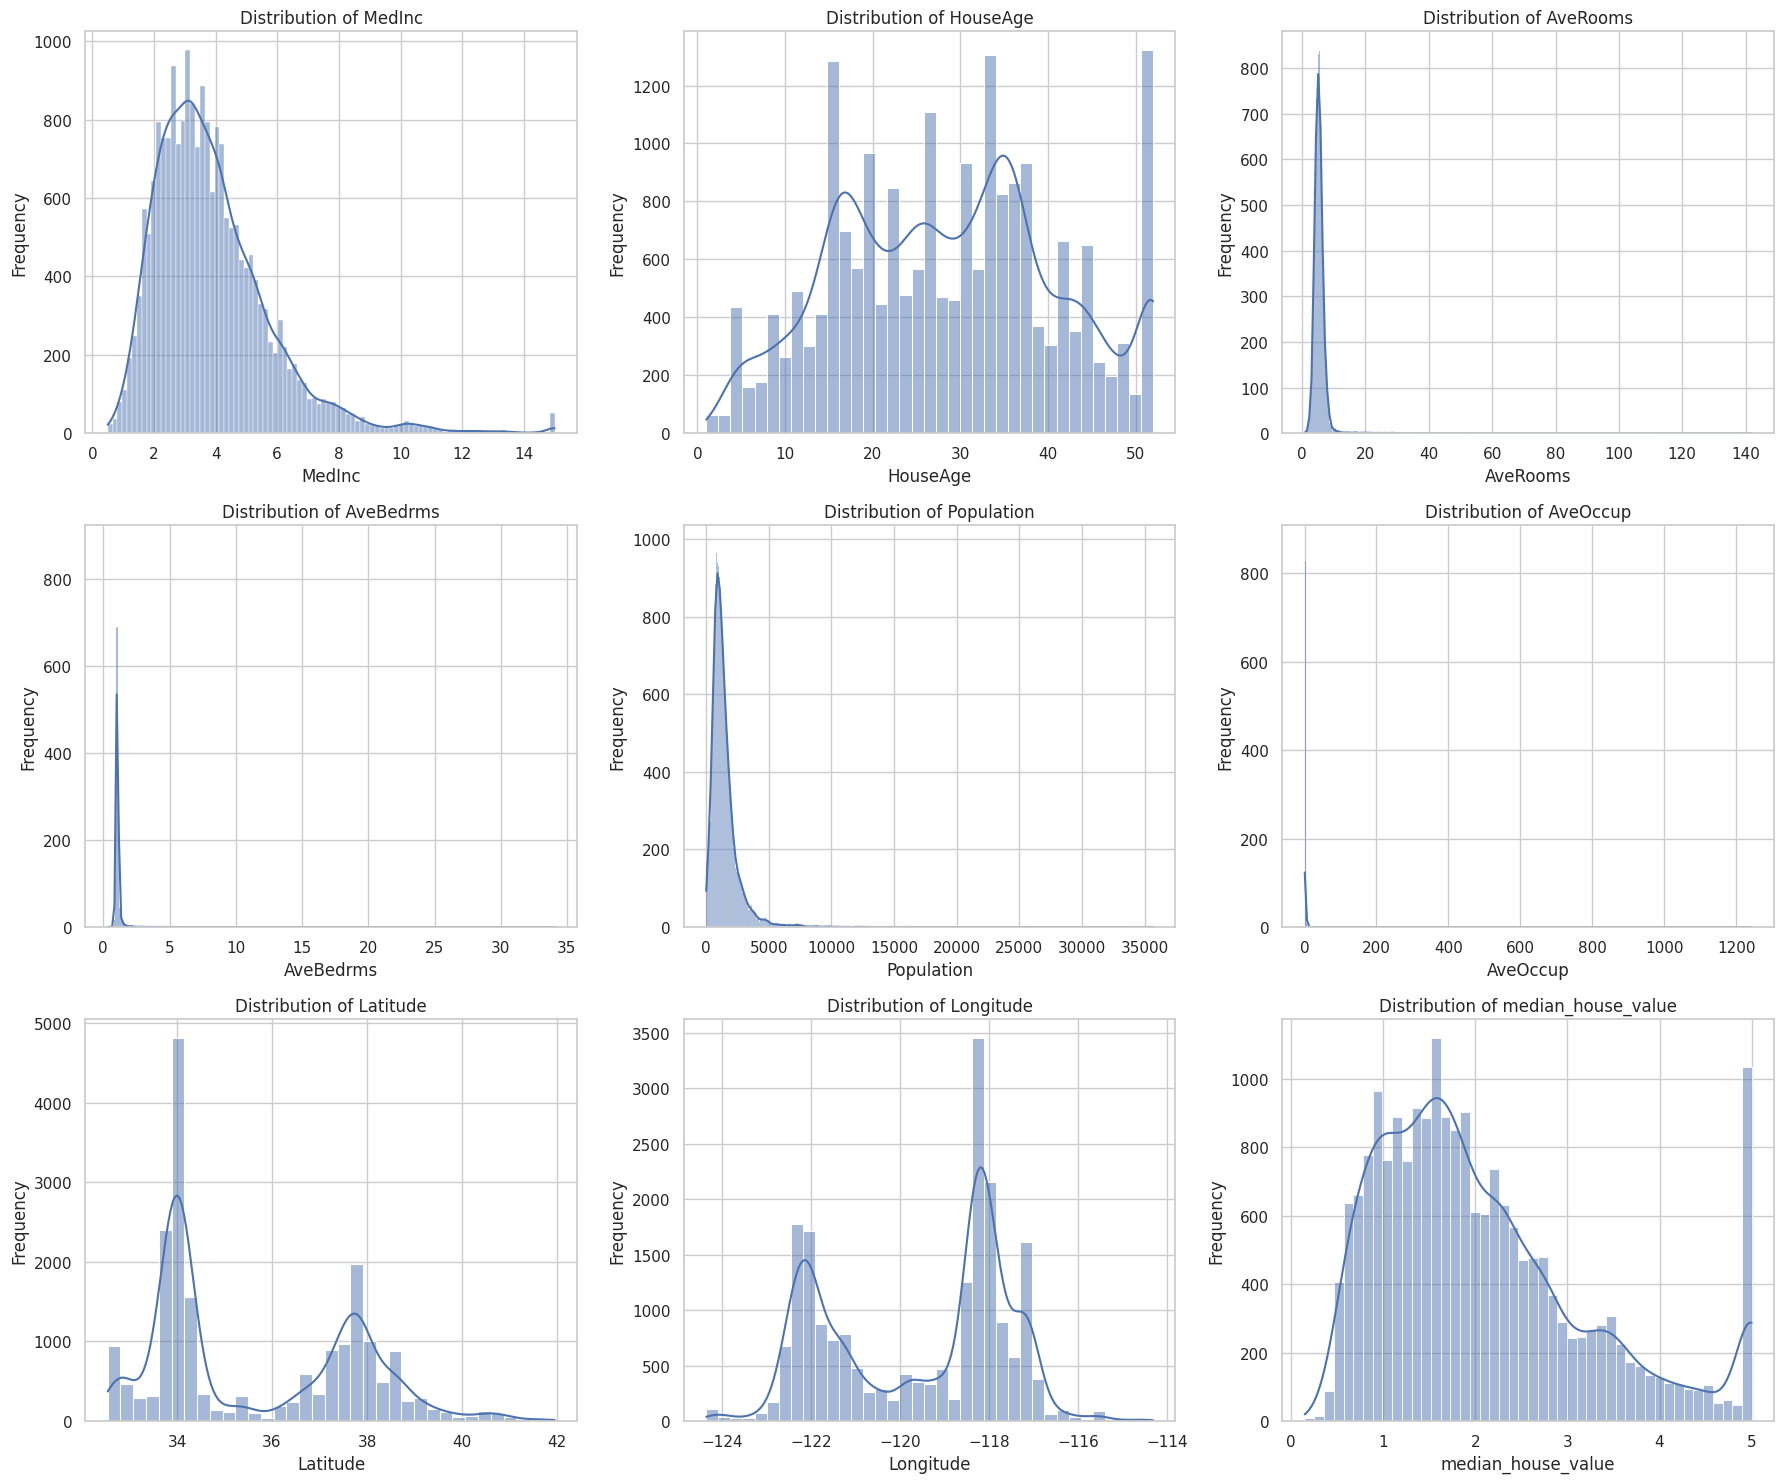

In [5]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Plot histogram for each feature
for i, column in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## 3.3. Target Variable Distribution

Understanding the distribution of our target variable is crucial as it helps us make decisions about potential transformations and evaluate model performance.

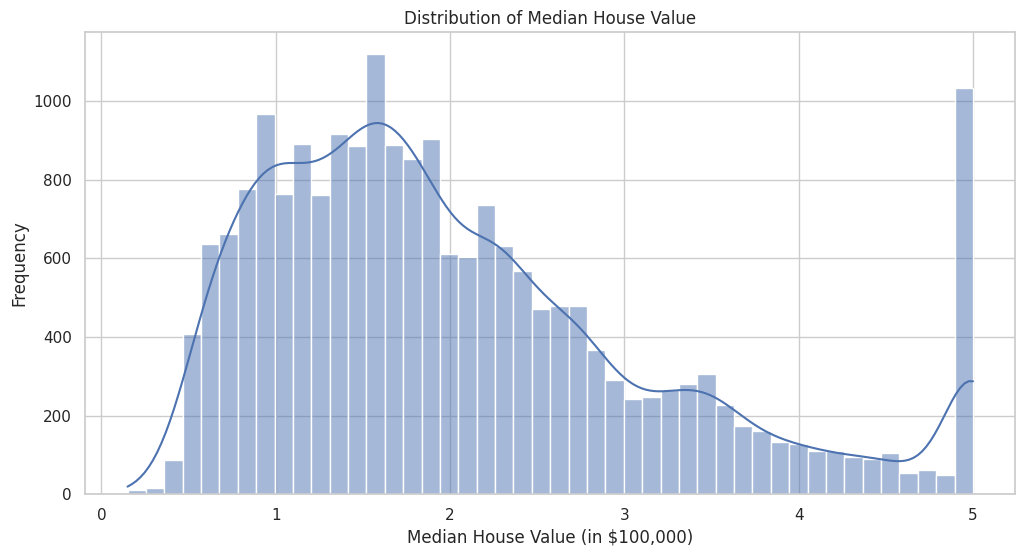

Target Variable Statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: median_house_value, dtype: float64


In [6]:
# Visualize the distribution of the target variable (median_house_value)
plt.figure(figsize=(12, 6))
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Frequency')
plt.show()

# Calculate some additional statistics for the target variable
target_stats = df['median_house_value'].describe()
print("Target Variable Statistics:")
print(target_stats)

# 4. Feature Relationships

Now let's explore the relationships between features and the target variable.

## 4.1. Correlation Analysis

Correlation analysis helps us identify which features might be most predictive of our target variable and detect multicollinearity among features.

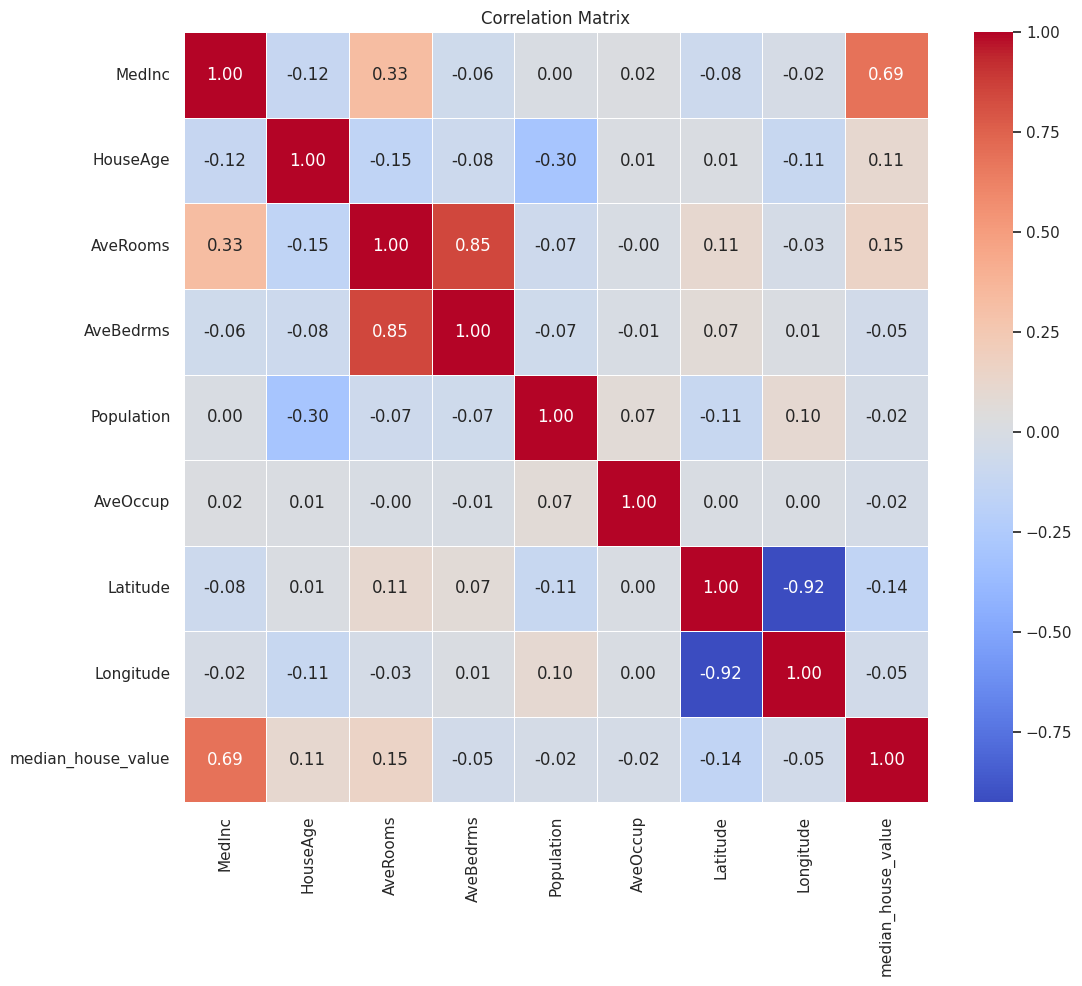

Correlations with Median House Value:
median_house_value    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: median_house_value, dtype: float64


In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Extract correlations with the target variable
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("Correlations with Median House Value:")
print(target_correlations)

## 4.2. Feature Pairplots

Pairplots help us visualize relationships between multiple features simultaneously, revealing potential patterns or clusters in the data.

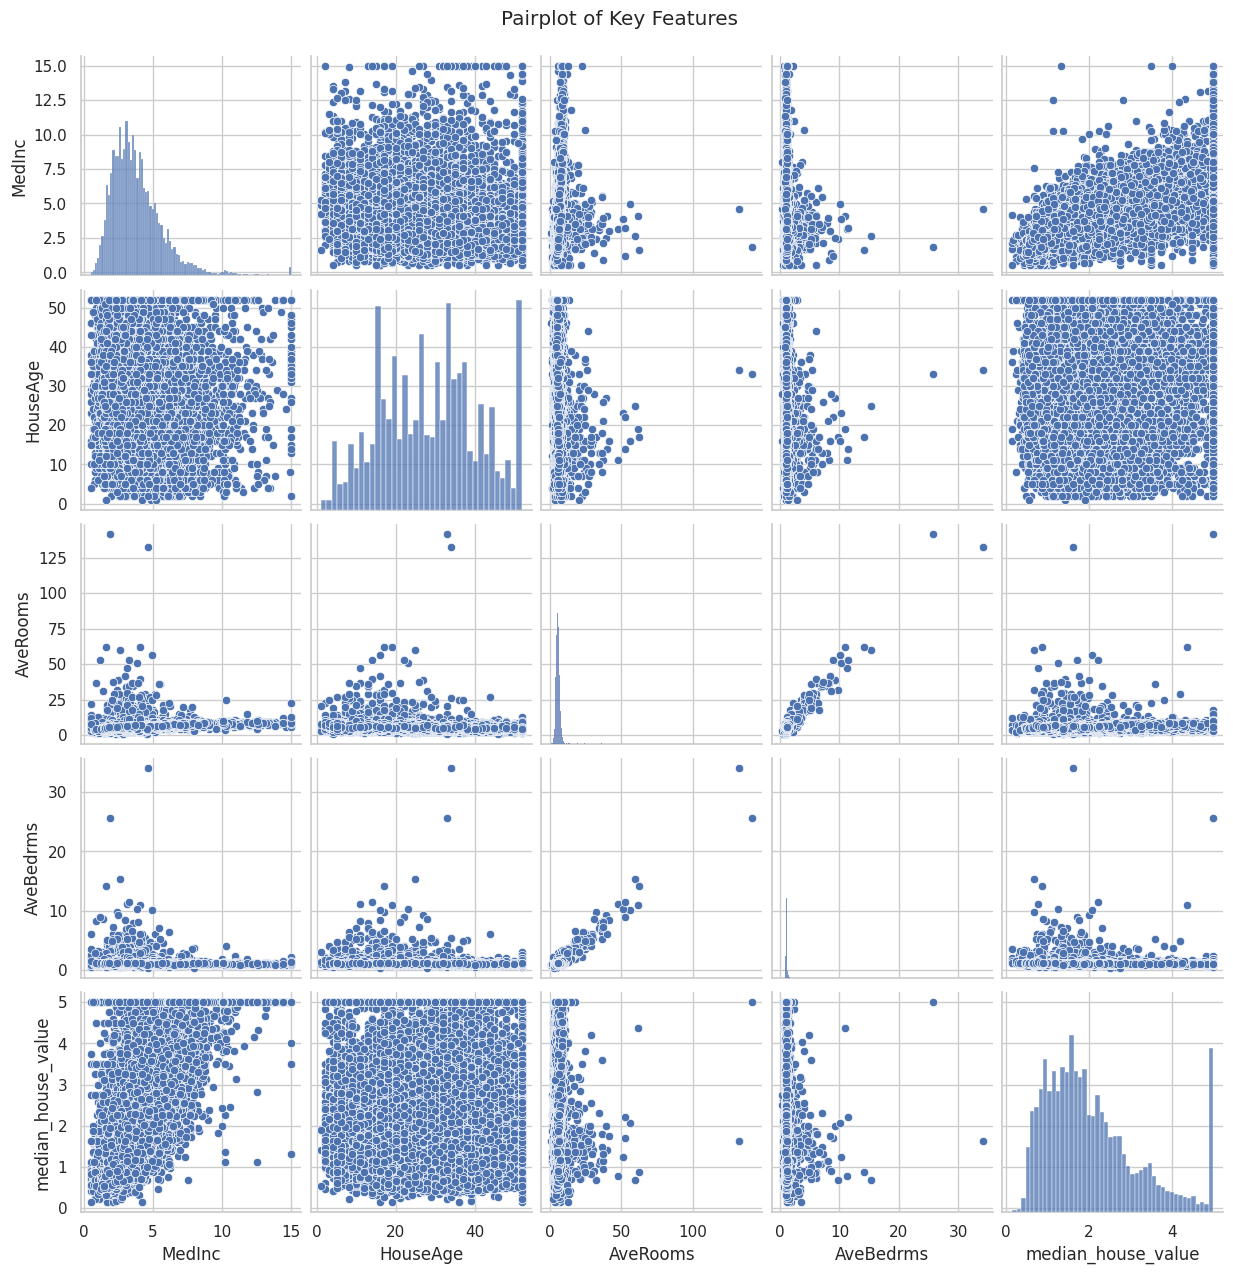

In [8]:
# Create a subset of the data for pairplot (for performance reasons)
features_subset = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'median_house_value']
sns.pairplot(df[features_subset], height=2.5)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 4.3. Relationship with Geographic Location

Since we have latitude and longitude data, we can visualize the geographic distribution of house prices.

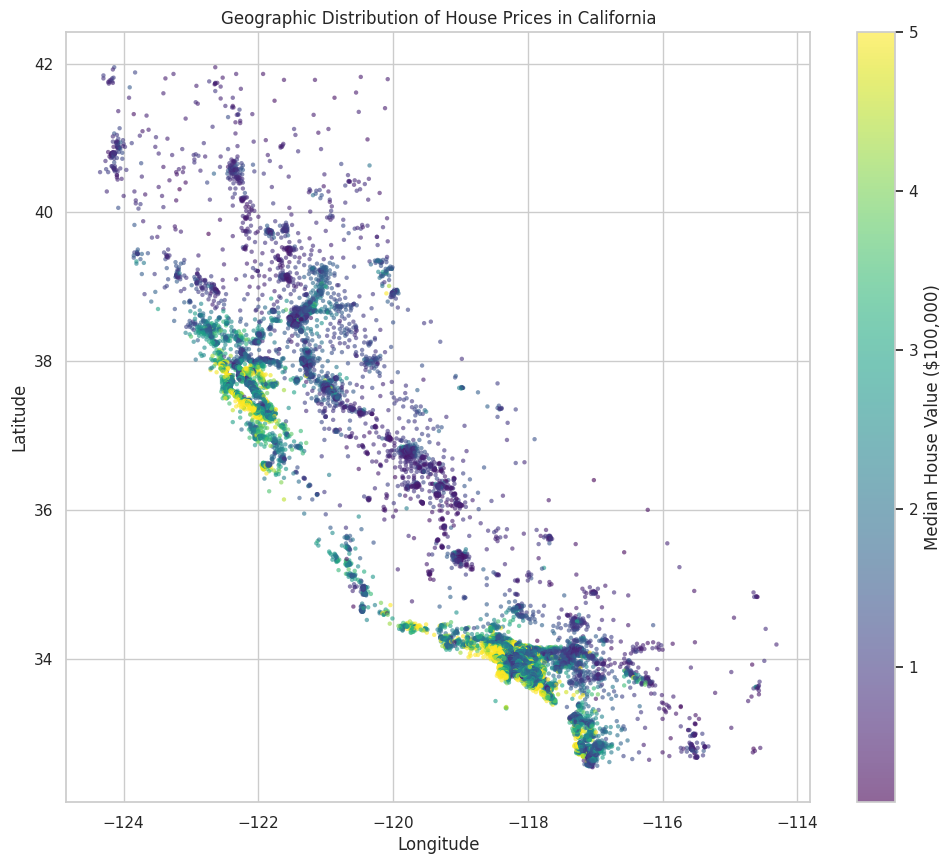

In [9]:
# Create a scatter plot of house locations, color-coded by house value
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['median_house_value'], cmap='viridis', 
                      alpha=0.6, s=10, edgecolors='none')
plt.colorbar(scatter, label='Median House Value ($100,000)')
plt.title('Geographic Distribution of House Prices in California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# 5. Feature Engineering Opportunities

Based on our exploratory analysis, let's identify potential feature engineering opportunities.

## 5.1. Derived Features

## 5.1. Derived Features

In [11]:
# Check the column names in your dataframe
print(df.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'median_house_value']


In [13]:
# Create a copy of the DataFrame to avoid modifying the original
df_features = df.copy()

# Creating new features
df_features['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']
df_features['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

# Since there's no 'Households' column, we'll use 'AveOccup' (average occupancy)
# assuming it represents the average household size
df_features['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

# Display the new features
print("Newly created features:")
print(df_features[['RoomsPerHousehold', 'BedroomsPerRoom', 'PopulationPerHousehold']].describe())

# Check correlation of new features with target
new_corr = df_features[['RoomsPerHousehold', 'BedroomsPerRoom', 
                         'PopulationPerHousehold', 'median_house_value']].corr()['median_house_value']
print("\nCorrelation with median_house_value:")
print(new_corr)

Newly created features:
       RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold
count       20640.000000     20640.000000            20640.000000
mean            1.976970         0.213075              499.539680
std             1.146020         0.058023              382.329753
min             0.002547         0.100000                1.000000
25%             1.522382         0.175426              280.000000
50%             1.937936         0.203181              409.000000
75%             2.296090         0.239834              605.000000
max            55.222222         1.000000             6082.000000

Correlation with median_house_value:
RoomsPerHousehold         0.209482
BedroomsPerRoom          -0.255624
PopulationPerHousehold    0.065843
median_house_value        1.000000
Name: median_house_value, dtype: float64


## 5.2. Detecting Outliers

Outliers can significantly impact model performance. Let's identify potential outliers in our dataset.

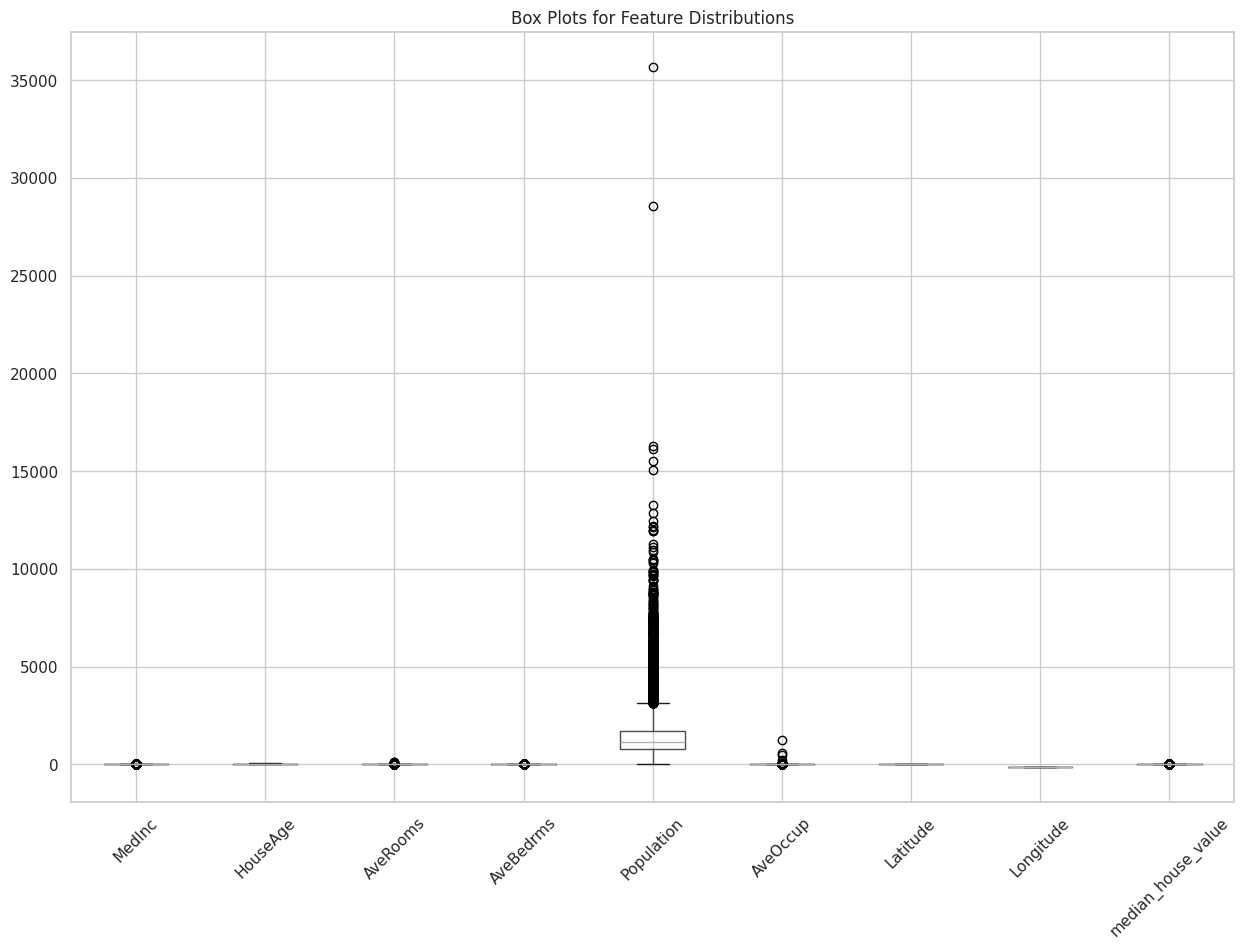

Count of extreme values per feature (|Z-score| > 3):
MedInc                345
HouseAge                0
AveRooms              133
AveBedrms             145
Population            342
AveOccup                8
Latitude                0
Longitude               0
median_house_value      0
dtype: int64


In [14]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Feature Distributions')
plt.xticks(rotation=45)
plt.show()

# Calculate the Z-score for each feature to identify extreme values
z_scores = pd.DataFrame()
for column in df.columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Count of extreme values (|Z-score| > 3) per feature
extreme_values = (np.abs(z_scores) > 3).sum()
print("Count of extreme values per feature (|Z-score| > 3):")
print(extreme_values)

# 6. Data Preprocessing Insights

Based on our exploration, let's summarize the key preprocessing steps needed for modeling.

## 6.1. Feature Scaling

As we observed, our features have different scales, which can impact model performance. Let's demonstrate standardization on our features.

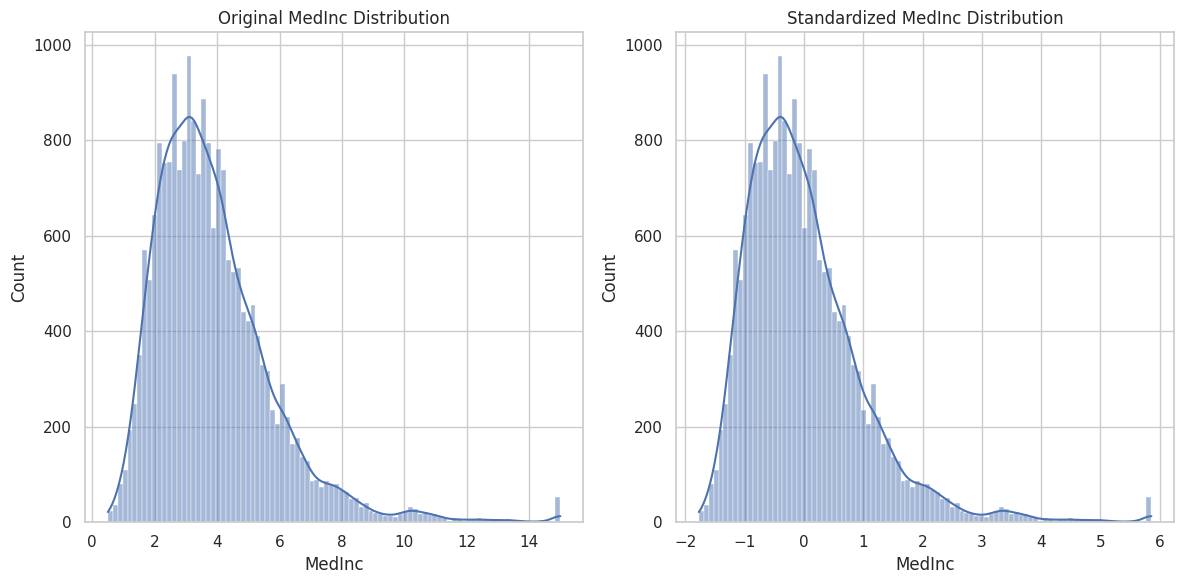

In [15]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# Compare original and scaled distributions for a sample feature
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['MedInc'], kde=True)
plt.title('Original MedInc Distribution')

plt.subplot(1, 2, 2)
sns.histplot(scaled_df['MedInc'], kde=True)
plt.title('Standardized MedInc Distribution')

plt.tight_layout()
plt.show()

## 6.2. Feature Selection

Based on our correlation analysis, we can identify the most important features for our predictive model.

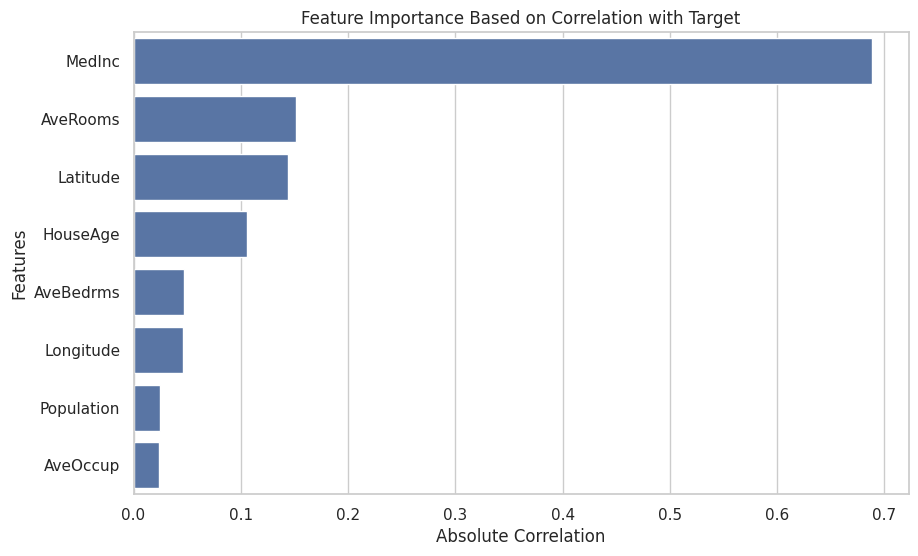

Feature importance ranking:
MedInc: 0.6881
AveRooms: 0.1519
Latitude: 0.1442
HouseAge: 0.1056
AveBedrms: 0.0467
Longitude: 0.0460
Population: 0.0246
AveOccup: 0.0237


In [16]:
# Sort features by absolute correlation with the target
feature_importance = abs(correlation_matrix['median_house_value']).sort_values(ascending=False)
feature_importance = feature_importance.drop('median_house_value')  # Remove target from list

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance Based on Correlation with Target')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.show()

print("Feature importance ranking:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance:.4f}")

# 7. Conclusions and Recommendations

Based on our exploratory data analysis, here are the key insights and recommendations for the modeling phase:

1. The dataset contains information about housing blocks in California with 8 features and a continuous target variable (median house value).

2. No missing values were detected, which simplifies our preprocessing pipeline.

3. Several features show strong correlation with the target variable, particularly MedInc (median income), which has the strongest positive correlation.

4. Geographic location (Latitude and Longitude) plays a significant role in housing prices, with clear clusters of high-value properties in certain areas.

5. Some features may benefit from transformation due to their skewed distributions.

6. Feature engineering opportunities include:
   - Creating ratio features like RoomsPerHousehold
   - Potentially clustering geographic locations into regions
   - Addressing outliers in features like AveRooms and Population

7. For modeling:
   - Apply feature scaling/standardization
   - Consider both linear models and tree-based models given the mix of linear and non-linear relationships
   - Implement cross-validation to ensure model robustness given the geographic clustering
   - Evaluate using appropriate metrics for regression tasks (RMSE, MAE, R²)

# 8. Next Steps

With our exploratory data analysis complete, here are the recommended next steps:

1. Create a data preprocessing pipeline that includes:
   - Feature scaling
   - Optional feature selection or dimensionality reduction
   - Implementation of engineered features

2. Train multiple regression models:
   - Linear Regression (baseline)
   - Ridge or Lasso Regression (to handle potential multicollinearity)
   - Tree-based models (Random Forest, Gradient Boosting)
   - Compare model performances

3. Fine-tune the best performing model using hyperparameter optimization

4. Evaluate the final model on a held-out test set

5. Deploy the model as part of the regression API with PostgreSQL integration